In [1]:
# Librerias a usar durante el proyecto

#Importamos las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.cluster.hierarchy as sch
import seaborn as sns
import pandas_profiling

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomTreesEmbedding
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

import xgboost as xg

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn import svm #support vector Machine
from sklearn.naive_bayes import GaussianNB #Naive bayes

import shap

In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df_target = pd.read_csv("C:/Users/34654/Desktop/Big_Data/Master/TFM/df_target.csv",sep=',')

In [3]:
df_target

,CICLO,CCAA,PROV,NVIVI,NIVEL,NPERS,EDAD5,RELPP1,SEXO1,NCONY,...,SIDAC1,SIDAC2,MUN1,PRORE1,REPAIRE1,TRAANT,AOI,CSE,FACTOREL,estadoIndividuo
0,187,16,1,1,1,1,35,1,1,2,...,1,1,1,,,,4.0,16,274.23,1
1,187,16,1,1,1,2,35,2,6,1,...,,,1,,,,9.0,,274.23,3
2,187,16,1,1,2,3,0,3,6,0,...,,,1,,,,0.0,,194.37,0
3,187,16,1,2,1,1,45,1,6,0,...,1,1,1,,,,3.0,13,203.82,1
4,187,16,1,2,1,2,20,3,1,0,...,2,2,1,,,,5.0,,203.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312744,191,52,52,59635,1,1,45,1,6,2,...,2,2,1,,,,6.0,14,169.61,2
312745,191,52,52,59635,1,2,45,2,1,1,...,1,1,1,,,,4.0,05,169.61,1
312746,191,52,52,59635,1,3,16,3,1,0,...,,,1,,,,9.0,,169.61,3
312747,191,52,52,59635,2,4,10,3,1,0,...,,,1,,,,0.0,,152.44,0


Variable Target:
- 0: Aquellos que no han trabajado aún.
- 1: Activos y empleados.
- 2: Desempleados.
- 3: Inactivos.

### Modelo base - target

In [5]:
pd.set_option("display.max_rows", 300)

In [6]:
df_target.dtypes

CICLO                int64
CCAA                 int64
PROV                 int64
NVIVI                int64
NIVEL                int64
NPERS                int64
EDAD5                int64
RELPP1               int64
SEXO1                int64
NCONY                int64
NPADRE               int64
NMADRE               int64
RELLMILI            object
ECIV1               object
PRONA1              object
REGNA1              object
NAC1                 int64
EXREGNA1            object
ANORE1             float64
NFORMA              object
RELLB1              object
EDADEST            float64
CURSR               object
NCURSR              object
CURSNR              object
NCURNR              object
HCURNR             float64
RELLB2              object
TRAREM              object
AYUDFA              object
AUSENT              object
RZNOTB              object
VINCUL              object
NUEVEM              object
OCUP1               object
ACT1                object
SITU                object
S

Para realizar nuestro primer modelo base procederemos de la siguiente forma:
1. Genero un conjunto de datos test y otro train repartidos con un 70%-30% del dataset respectivamente.
2. Genero los resultados del modelo entrenado.
3. Observamos los resultados del test y de las predicciones en histogramos.
4. Comprobamos la confianza del modelo con lo siguiente:
    - La matriz de confusión.
    - Presición del modelo.
    - El recall del modelo.
    - La curva ROC.

In [7]:
pd.set_option("display.max_rows", 10)

In [9]:
df_target.columns

Index(['CICLO', 'CCAA', 'PROV', 'NVIVI', 'NIVEL', 'NPERS', 'EDAD5', 'RELPP1',
       'SEXO1', 'NCONY', 'NPADRE', 'NMADRE', 'RELLMILI', 'ECIV1', 'PRONA1',
       'REGNA1', 'NAC1', 'EXREGNA1', 'ANORE1', 'NFORMA', 'RELLB1', 'EDADEST',
       'CURSR', 'NCURSR', 'CURSNR', 'NCURNR', 'HCURNR', 'RELLB2', 'TRAREM',
       'AYUDFA', 'AUSENT', 'RZNOTB', 'VINCUL', 'NUEVEM', 'OCUP1', 'ACT1',
       'SITU', 'SP', 'DUCON1', 'DUCON2', 'DUCON3', 'TCONTM', 'TCONTD', 'DREN',
       'DCOM', 'PROEST', 'REGEST', 'PARCO1', 'PARCO2', 'HORASP', 'HORASH',
       'HORASE', 'EXTRA', 'EXTPAG', 'EXTNPG', 'RZDIFH', 'TRAPLU', 'OCUPLU1',
       'ACTPLU1', 'SITPLU', 'HORPLU', 'MASHOR', 'DISMAS', 'RZNDISH', 'HORDES',
       'BUSOTR', 'BUSCA', 'DESEA', 'FOBACT', 'NBUSCA', 'ASALA', 'EMBUS',
       'ITBU', 'DISP', 'RZNDIS', 'EMPANT', 'DTANT', 'OCUPA', 'ACTA', 'SITUA',
       'OFEMP', 'SIDI1', 'SIDI2', 'SIDI3', 'SIDAC1', 'SIDAC2', 'MUN1',
       'PRORE1', 'REPAIRE1', 'TRAANT', 'AOI', 'CSE', 'FACTOREL',
       'estadoIndivid

In [6]:
#Borramos del dataset los menos de 16 años
df_target2 = df_target

In [7]:
df_target.groupby(['EDAD5'])['EDAD5'].count()

EDAD5
0     11925
5     15278
10    20576
16    12968
20    14816
25    12996
30    13933
35    18475
40    24110
45    24913
50    25457
55    24587
60    22132
65    70583
Name: EDAD5, dtype: int64

In [8]:
indexedad = df_target2[ df_target2['EDAD5'] < 16 ].index
df_target2.drop(indexedad , inplace=True)
df_target2.groupby(['EDAD5'])['EDAD5'].count()

EDAD5
16    12968
20    14816
25    12996
30    13933
35    18475
40    24110
45    24913
50    25457
55    24587
60    22132
65    70583
Name: EDAD5, dtype: int64

In [10]:
df_target2

,CICLO,CCAA,PROV,NVIVI,NIVEL,NPERS,EDAD5,RELPP1,SEXO1,NCONY,...,SIDAC1,SIDAC2,MUN1,PRORE1,REPAIRE1,TRAANT,AOI,CSE,FACTOREL,estadoIndividuo
0,187,16,1,1,1,1,35,1,1,2,...,1,1,1,,,,4.0,16,274.23,1
1,187,16,1,1,1,2,35,2,6,1,...,,,1,,,,9.0,,274.23,3
3,187,16,1,2,1,1,45,1,6,0,...,1,1,1,,,,3.0,13,203.82,1
4,187,16,1,2,1,2,20,3,1,0,...,2,2,1,,,,5.0,,203.82,1
5,187,16,1,2,1,3,16,3,6,0,...,,,1,,,,9.0,,203.82,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312740,191,52,52,59634,1,4,20,3,6,0,...,,,1,,,,9.0,,104.70,3
312741,191,52,52,59634,1,5,25,4,6,2,...,,,1,,,,9.0,,104.70,3
312744,191,52,52,59635,1,1,45,1,6,2,...,2,2,1,,,,6.0,14,169.61,2
312745,191,52,52,59635,1,2,45,2,1,1,...,1,1,1,,,,4.0,05,169.61,1


In [11]:
df_target2.columns[df_target2.isnull().any()]

Index(['ANORE1', 'EDADEST', 'HCURNR', 'DREN', 'DCOM', 'DTANT'], dtype='object')

<AxesSubplot:>

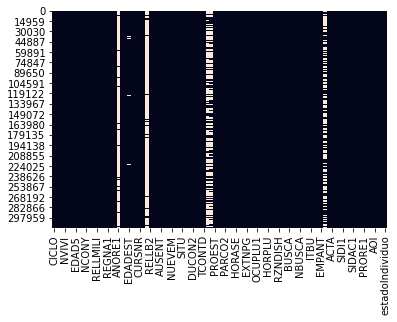

In [12]:
sns.heatmap(df_target2.isnull(), cbar=False)

#### Variables de control: CICLO,NVIVI,CSE,FACTOREL

In [13]:
train_base = ['CCAA', 'NIVEL', 'NPERS', 'EDAD5', 'RELPP1',
       'SEXO1', 'NCONY', 'NPADRE', 'NMADRE', 'RELLMILI', 'ECIV1', 'PRONA1',
       'REGNA1', 'NAC1', 'EXREGNA1', 'NFORMA', 'RELLB1',
       'CURSR', 'NCURSR', 'CURSNR', 'NCURNR', 'RELLB2', 'TRAREM',
       'AYUDFA', 'AUSENT', 'RZNOTB', 'VINCUL', 'NUEVEM', 'OCUP1', 'ACT1',
       'SITU', 'SP', 'DUCON1', 'DUCON2', 'DUCON3', 'TCONTM', 'TCONTD',
        'PROEST', 'REGEST', 'PARCO1', 'PARCO2', 'HORASP', 'HORASH',
       'HORASE', 'EXTRA', 'EXTPAG', 'EXTNPG', 'RZDIFH', 'TRAPLU', 'OCUPLU1',
       'ACTPLU1', 'SITPLU', 'HORPLU', 'MASHOR', 'DISMAS', 'RZNDISH', 'HORDES',
       'BUSOTR', 'BUSCA', 'DESEA', 'FOBACT', 'NBUSCA', 'ASALA', 'EMBUS',
       'ITBU', 'DISP', 'RZNDIS', 'EMPANT', 'OCUPA', 'ACTA', 'SITUA',
       'OFEMP', 'SIDI1', 'SIDI2', 'SIDI3', 'SIDAC1', 'SIDAC2', 'MUN1',
       'PRORE1', 'REPAIRE1', 'TRAANT']

In [59]:
train,test=train_test_split(df_target2,test_size=0.3,random_state=37)

train_X=train[train_base]
train_Y=train['estadoIndividuo']

test_X=test[train_base]
test_Y=test['estadoIndividuo']

X=df_target2[train_base]
Y=df_target2['estadoIndividuo']

In [60]:
#train_X_onehot = pd.get_dummies(train_X)
train_X_onehot = pd.get_dummies(train_X[train_base], drop_first=True)
#test_X_onehot = pd.get_dummies(test_X)
test_X_onehot = pd.get_dummies(test_X[train_base], drop_first=True)

In [61]:
model_xg_base=xg.XGBClassifier(n_estimators=100,learning_rate=0.01)
model_xg_base.fit(train_X_onehot,train_Y)

[14:27:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

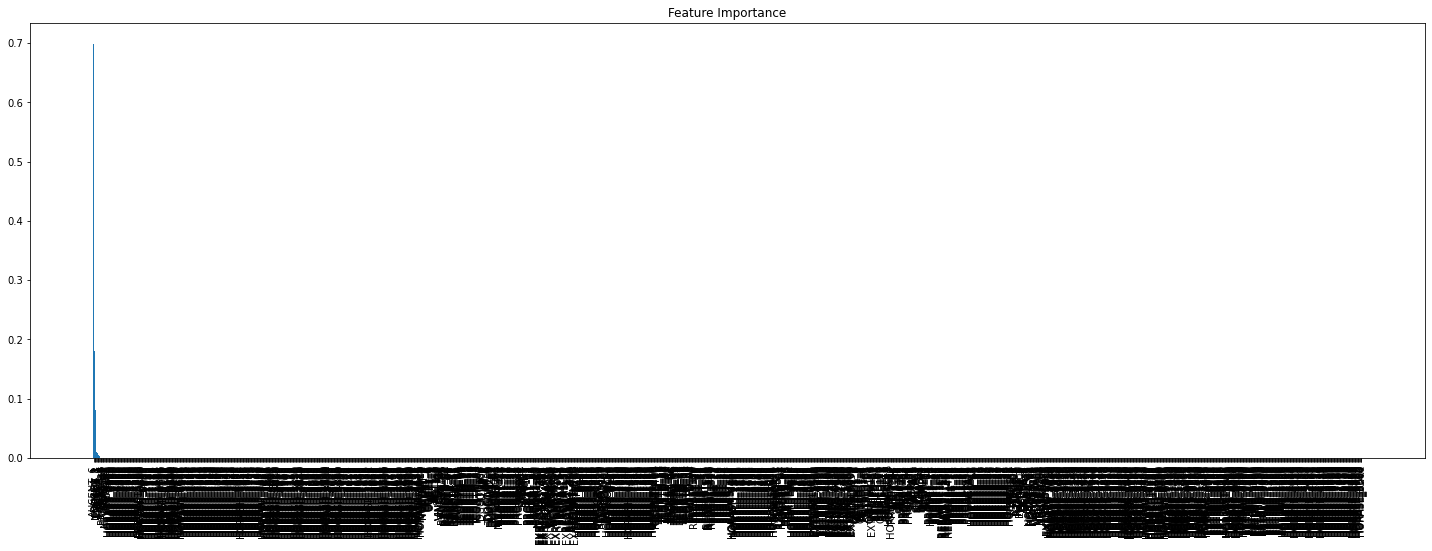

In [62]:
importances = model_xg_base.feature_importances_

indices = np.argsort(importances)[::-1]

names = [train_X_onehot.columns[i] for i in indices]

plt.figure()
plt.rcParams['figure.figsize'] = [45, 30]
plt.title("Feature Importance")
plt.bar(range(train_X_onehot.shape[1]), importances[indices])
plt.xticks(range(train_X_onehot.shape[1]), names, rotation=90)
plt.show()

In [63]:
names[0:20]

['AUSENT_6',
 'BUSCA_1',
 'FOBACT_1',
 'NUEVEM_1',
 'EMPANT_1',
 'BUSCA_6',
 'AYUDFA_1',
 'DISP_1',
 'ASALA_1',
 'FOBACT_6',
 'ASALA_6',
 'PRONA1_26',
 'SIDAC1_1',
 'PRONA1_48',
 'SIDI2_03',
 'NFORMA_SU',
 'EDAD5',
 'NMADRE',
 'OFEMP_3',
 'HORASP_6500']

In [35]:
train_base_2 = ['CCAA', 'EDAD5','SEXO1', 'NCONY', 'NPADRE', 'NMADRE', 'ECIV1', 'PRONA1',
       'REGNA1', 'NAC1', 'EXREGNA1', 'NFORMA', 'EDADEST', 'OCUP1', 'ACT1',
       'SITU', 'SP', 'DUCON1', 'DUCON2', 'DUCON3',
       'PARCO1', 'PARCO2',
       'EXTRA', 'RZDIFH', 'TRAPLU', 'OCUPLU1',
       'ACTPLU1', 'SITPLU', 'MASHOR', 'DISMAS', 'RZNDISH',
       'BUSOTR', 'BUSCA', 'DESEA', 'FOBACT', 'NBUSCA', 'ASALA', 'EMBUS',
       'ITBU', 'DISP', 'RZNDIS', 'EMPANT', 'OCUPA', 'ACTA', 'SITUA',
       'OFEMP', 'SIDI1', 'SIDI2', 'SIDI3', 'SIDAC1', 'SIDAC2', 'MUN1',
       'REPAIRE1', 'TRAANT']

In [36]:
train,test=train_test_split(df_target2,test_size=0.3,random_state=37)

train_X=train[train_base_2]
train_Y=train['estadoIndividuo']

test_X=test[train_base_2]
test_Y=test['estadoIndividuo']

X=df_target2[train_base]
Y=df_target2['estadoIndividuo']

In [37]:
#train_X_onehot = pd.get_dummies(train_X)
train_X_onehot = pd.get_dummies(train_X[train_base_2], drop_first=True)
#test_X_onehot = pd.get_dummies(test_X)
test_X_onehot = pd.get_dummies(test_X[train_base_2], drop_first=True)

In [38]:
train_X_onehot.shape

(185479, 324)

In [39]:
train_X_onehot

,CCAA,EDAD5,SEXO1,NCONY,NPADRE,NMADRE,NAC1,EDADEST,MUN1,ECIV1_2,...,REPAIRE1_125,REPAIRE1_128,REPAIRE1_200,REPAIRE1_300,REPAIRE1_310,REPAIRE1_350,REPAIRE1_400,REPAIRE1_410,REPAIRE1_420,REPAIRE1_500
144466,8,65,6,1,0,0,1,11.0,1,1,...,0,0,0,0,0,0,0,0,0,0
68213,1,60,1,2,0,0,1,12.0,1,1,...,0,0,0,0,0,0,0,0,0,0
151434,10,40,6,0,0,0,1,14.0,1,0,...,0,0,0,0,0,0,0,0,0,0
49385,8,50,1,2,0,0,1,12.0,1,1,...,0,0,0,0,0,0,0,0,0,0
285450,1,55,1,2,0,0,2,19.0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101501,12,35,1,1,0,0,1,19.0,1,0,...,0,0,0,0,0,0,0,0,0,0
123693,5,65,1,1,0,0,1,15.0,1,1,...,0,0,0,0,0,0,0,0,0,0
233723,12,25,6,1,0,0,3,17.0,1,1,...,0,0,0,0,0,0,0,0,0,0
191724,1,40,6,1,0,0,1,27.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
model_xg_base2=xg.XGBClassifier(n_estimators=100,learning_rate=0.01)
model_xg_base2.fit(train_X_onehot,train_Y)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

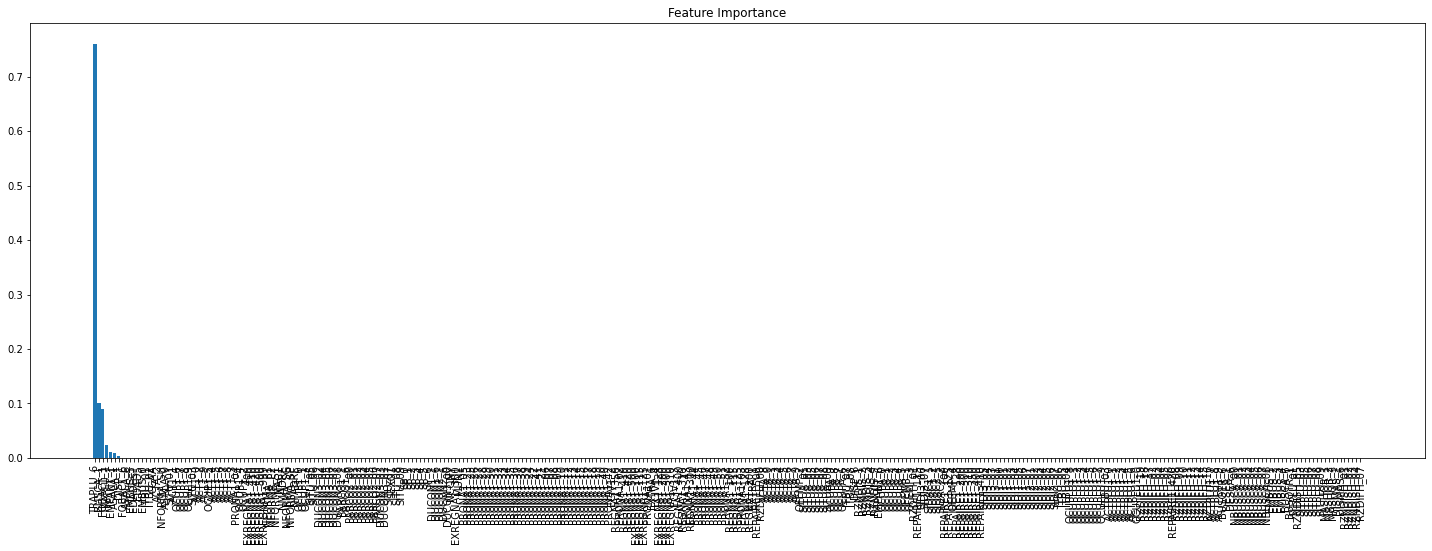

In [53]:
importances = model_xg_base2.feature_importances_

indices = np.argsort(importances)[::-1]

names = [train_X_onehot.columns[i] for i in indices]

plt.figure()
plt.rcParams['figure.figsize'] = [25, 8]
plt.title("Feature Importance")
plt.bar(range(train_X_onehot.shape[1]), importances[indices])
plt.xticks(range(train_X_onehot.shape[1]), names, rotation=90)
plt.show()

In [56]:
#Variables mas importantes del gráfico
names[0:20]

['TRAPLU_6',
 'BUSCA_1',
 'FOBACT_1',
 'TRAPLU_1',
 'EMPANT_1',
 'ASALA_1',
 'DISP_1',
 'FOBACT_6',
 'ASALA_6',
 'EMBUS_5',
 'EDADEST',
 'EDAD5',
 'EMBUS_0',
 'ITBU_01',
 'ITBU_02',
 'CCAA',
 'ACTA_2',
 'NFORMA_SU',
 'ASALA_0',
 'SITU_01']